In [1]:
import pandas as pd
import sklearn.preprocessing as preproc

In [3]:
df = pd.read_csv('OnlineNewsPopularity.csv', delimiter = ', ')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
# 원본 데이터 확인 - 기사의 단어 수 
df['n_tokens_content'].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([219., 255., 211., ..., 442., 682., 157.])

In [5]:
# min - max 스케일링
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])

In [6]:
df['minmax'].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [7]:
# 표준화 - 정의에 따라 일부 출력은 음수가 될 수 있음
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])

In [8]:
df['standardized'].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [13]:
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis = 0)
df['l2_normalized'].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(27.125, 0.5, 'Number of articles')

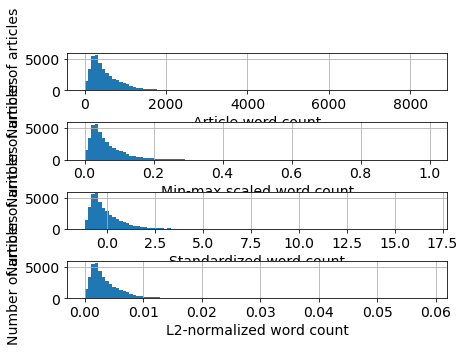

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
fig.tight_layout()
df['n_tokens_content'].hist(ax = ax1, bins = 100)
ax1.tick_params(labelsize = 14)
ax1.set_xlabel('Article word count', fontsize = 14)
ax1.set_ylabel('Number of articles', fontsize = 14)

df['minmax'].hist(ax = ax2, bins = 100)
ax2.tick_params(labelsize = 14)
ax2.set_xlabel('Min-max scaled word count', fontsize = 14)
ax2.set_ylabel('Number of articles', fontsize = 14)

df['standardized'].hist(ax = ax3, bins = 100)
ax3.tick_params(labelsize = 14)
ax3.set_xlabel('Standardized word count', fontsize = 14)
ax3.set_ylabel('Number of aritcles', fontsize = 14)

df['l2_normalized'].hist(ax = ax4, bins = 100)
ax4.tick_params(labelsize = 14)
ax4.set_xlabel('L2-normalized word count', fontsize = 14)
ax4.set_ylabel('Number of articles', fontsize = 14)